## Tugas 1

In [19]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

In [20]:
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]

In [21]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 = {}, Q3 = {}, IQR = {}'.format(Q1,Q3,IQR))

outliers_atas = (price2['House_Price'] > (Q3 + 1.5*IQR))
price2.loc[outliers_atas].head()

Q1 = 4660000.0, Q3 = 7180500.0, IQR = 2520500.0


,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,679,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


## Tugas 2

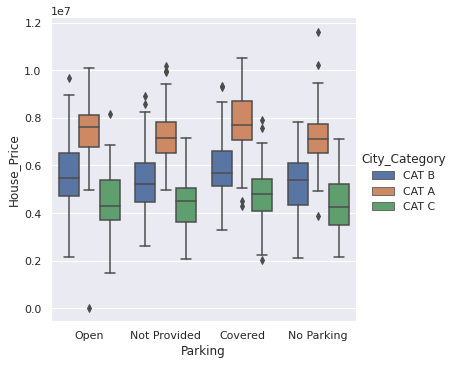

In [22]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

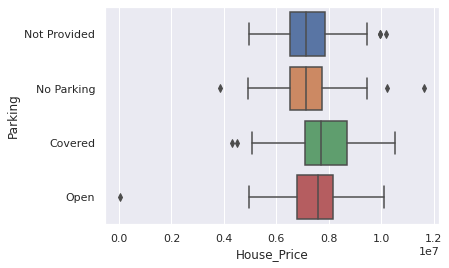

In [23]:
CatA = price2[price2.City_Category =='CAT A']
p1 = sns.boxplot(x = 'House_Price', y = 'Parking', data = CatA)

In [24]:
#Outliers bawah Category A

CatA_Open = CatA[CatA.Parking == 'Open']

Q1_OA = CatA_Open['House_Price'].quantile(0.25)
Q3_OA = CatA_Open['House_Price'].quantile(0.75)
IQR_OA = Q3_OA - Q1_OA
outliers_bawah_OA = (CatA_Open['House_Price']< (Q1_OA - 1.5*IQR_OA))

CatA_Covered = CatA[CatA.Parking == 'Covered']

Q1_CA = CatA_Covered['House_Price'].quantile(0.25)
Q3_CA = CatA_Covered['House_Price'].quantile(0.75)
IQR_CA = Q3_CA - Q1_CA
outliers_bawah_CA = (CatA_Covered['House_Price']< (Q1_CA - 1.5*IQR_CA))

CatA_NPA = CatA[CatA.Parking == 'No Parking']

Q1_NPA = CatA_NPA['House_Price'].quantile(0.25)
Q3_NPA = CatA_NPA['House_Price'].quantile(0.75)
IQR_NPA = Q3_NPA - Q1_NPA
outliers_bawah_NPA = (CatA_NPA['House_Price']< (Q1_NPA - 1.5*IQR_NPA))


In [25]:
CatA_Open.loc[outliers_bawah_OA].head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
811,812,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [26]:
CatA_Covered.loc[outliers_bawah_CA].head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
320,321,11240.0,9781.0,15232.0,1523.0,1813.0,Covered,CAT A,520,4496000
875,876,9997.0,12349.0,13043.0,1350.0,1606.0,Covered,CAT A,770,4303000


In [27]:
CatA_NPA.loc[outliers_bawah_NPA].head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
409,410,8773.0,13547.0,15551.0,1509.0,1799.0,No Parking,CAT A,960,3860000


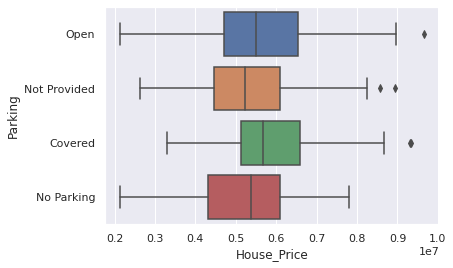

In [28]:
CatB = price2[price2.City_Category =='CAT B']
p = sns.boxplot (x = 'House_Price', y = 'Parking', data = CatB)

Tidak terdapat outlier bawah pada kota Category B


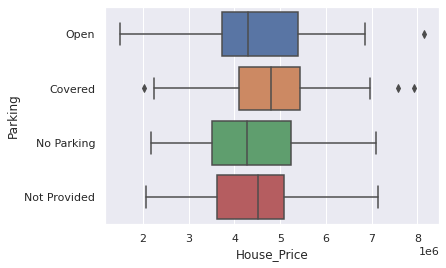

In [29]:
CatC = price2[price2.City_Category =='CAT C']
p = sns.boxplot (x = 'House_Price', y = 'Parking', data = CatC)

In [30]:
#Outlier bawah kategori C

CatC_Covered = CatC[CatC.Parking == 'Covered']

Q1_CC = CatC_Covered['House_Price'].quantile(0.25)
Q3_CC = CatC_Covered['House_Price'].quantile(0.75)
IQR_CC = Q3_CC - Q1_CC
outliers_bawah_CC = (CatC_Covered['House_Price']< (Q1_CC - 1.5*IQR_CC))

CatC_Covered.loc[outliers_bawah_CC].head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
622,623,4619.0,10768.0,11787.0,1624.0,1946.0,Covered,CAT C,870,2027000


# Tugas 3

In [31]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [32]:
# Loading  Data
tips = sns.load_dataset('tips')

## 1. Adakah Tipe Variabel yang kurang tepat ?

1. Adakah Tipe Variabel yang kurang tepat ?
  



In [33]:
#program reads file
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Terlihat pada tipe variabel 'day' dan 'time' adalah object. Sedangkan pada kenyataannya, 'day' dan 'time' bukan object. Variabel 'day' dan 'time' berupa waktu yang harusnya bertipe datetime64. Terdapat Kesalahan juga pada Tipe Variabel dalam variabel "Smoker", seharusnya menggunakan data type Float 

In [34]:
tips.replace(('Yes', 'No'), (True, False), inplace=True)

## 2. Apakah data numeriknya cenderung berdistribusi normal?

2. Apakah data numeriknya cenderung berdistribusi normal?

total_bill    19.785943
tip            2.998279
smoker         0.381148
size           2.569672
dtype: float64

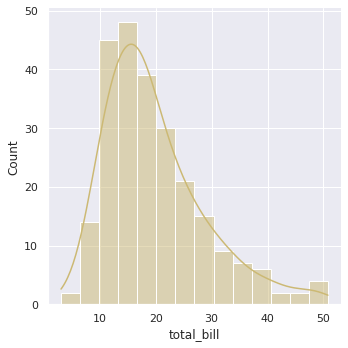

In [35]:
#visualitation
sns.displot(data=tips, x='total_bill',kde=True,color='y')
tips.mean() #mean

Terlihat dari visualisasi datanya dalam plot di atas, kurvanya tidak bersifat simetris (tidak berbentuk lonceng (bell curve)) atau nilai rata ratanya bukan merupakan titik puncak kurva. Dengan demikian, data ini tidak berdistribusi normal.

## 3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?


3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?


In [36]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    bool    
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: bool(1), category(3), float64(2), int64(1)
memory usage: 7.2 KB


### Cek Duplicate

In [37]:
#mengecek apakah ada duplikat data?
print(tips.shape)
tips.duplicated().sum()

(244, 7)


1

In [38]:
#menghapus entri yang memiliki data duplikat
tips.drop_duplicates(inplace=True)
print(tips.duplicated().sum()) #no more duplicates
print(tips.shape)  # re-check by printing data size

0
(243, 7)


### Cek Missing Value

In [39]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [40]:
tips.dropna(inplace=True)
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### Cek Outlier & Noise

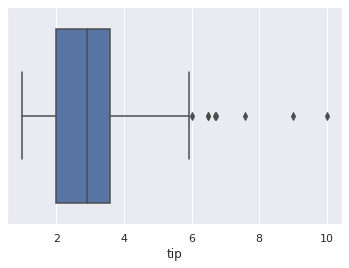

In [41]:
# mengecek apakah ada outlier
import seaborn as sns
t = sns.boxplot(x = "tip", data = tips)

Berdasarkan boxplot di atas, terlihat bahwa ada outlier.

In [42]:
df = np.abs(tips.total_bill - tips.total_bill.mean())<=(2*tips.total_bill.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()
df

(243,)


0      True
1      True
2      True
3      True
4      True
       ... 
239    True
240    True
241    True
242    True
243    True
Name: total_bill, Length: 243, dtype: bool

In [43]:
tips2 = tips[df] # Data tanpa outliers
print(tips2.shape, tips.shape)

(229, 7) (243, 7)


In [44]:
df2 = np.abs(tips2.tip - tips2.tip.mean())<=(2*tips2.tip.std())
# mu-2s<x<mu+2s
print(df2.shape)
df2.head()
df2

(229,)


0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240     True
241     True
242     True
243     True
Name: tip, Length: 229, dtype: bool

In [45]:
tips3 = tips2[df2] # Data tanpa outliers & noise di tip
tips3.shape

(221, 7)

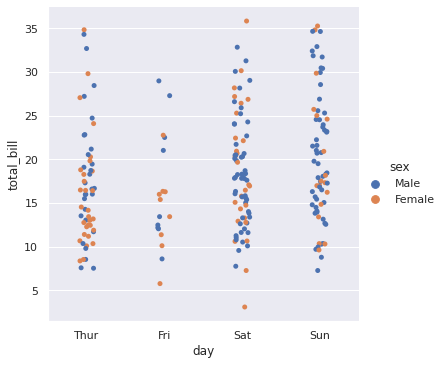

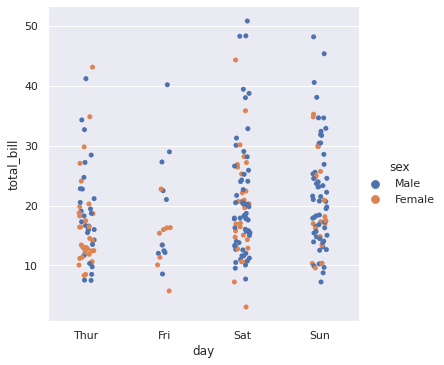

In [46]:
p= sns.catplot(x="day", y="total_bill",hue="sex", data=tips2)
r= sns.catplot(x="day", y="total_bill",hue="sex", data=tips)

Setelah melihat nilai-nilai yang ditampilkan plot, terdapat noise, yang sehingga diperlukan proses pembersihan

## 4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

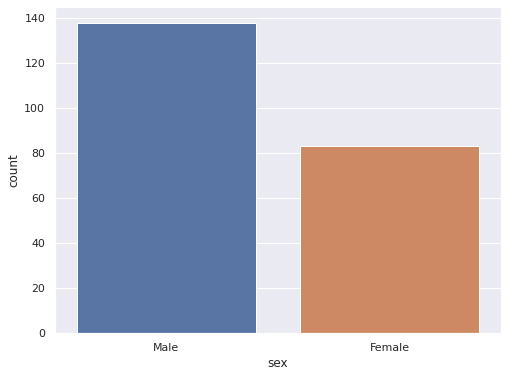

In [47]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="sex", data=tips3)

Berdasarkan chart di atas, dapat disimpulkan bahwa pelanggan pria dan pelanggan wanita cenderung tidak proporsional.

## 5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?

5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?

Berdasarkan plot dari data, terlihat bahwa mean dari Pria atau wanita terhadap tips adalah hampir sama. Oleh karena itu, dapat dikatakan bahwa tidak ada kecenderungan antara pria atau wanita dalam memberi tips

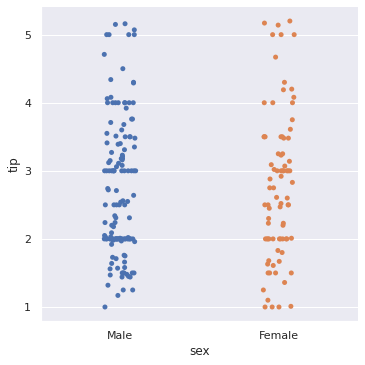

In [48]:
t = sns.catplot(x = "sex", y = "tip", data=tips3)

In [49]:
tips3[["sex","tip"]].groupby("sex").mean()

,tip
sex,
Male,2.741377
Female,2.777229


## 6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?


6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

Berdasarkan plot dari data serta nilai mean, terlihat ada kecenderungan tips lebih besar pada hari Minggu dibandingkan hari-hari lainnya (Kamis, Jumat, dan Sabtu)

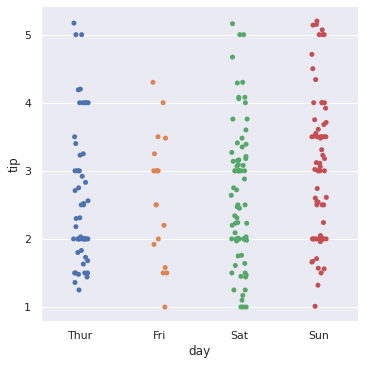

In [50]:
p= sns.catplot(x="day", y="tip", data=tips3)

In [51]:
tips3[["day", "tip"]].groupby("day").mean()

,tip
day,
Thur,2.583860
Fri,2.623889
Sat,2.643205
Sun,3.060882


## 7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?


7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

Berdasarkan plot dari data, terlihat bahwa mean dari customer perokok atau non-perokok terhadap tips adalah hampir sama. Oleh karena itu, dapat dikatakan bahwa tidak ada kecenderungan antara customer perokok dengan customer non-perokok dalam memberi tips.

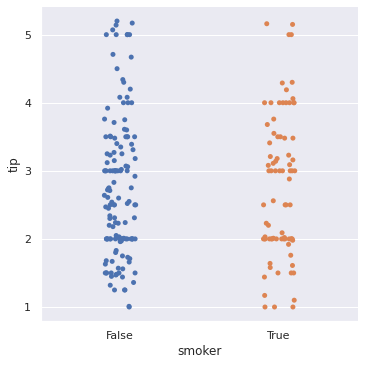

In [52]:
t = sns.catplot(x = "smoker", y = "tip", data=tips3)

In [53]:
tips3[["smoker","tip"]].groupby("smoker").mean()

,tip
smoker,
False,2.745643
True,2.770741


## 8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?

### Nomor 5 

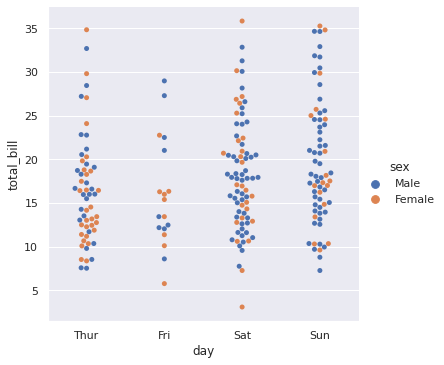

In [54]:
r =sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm",data=tips3)

In [55]:
tips3[["sex", "tip","day"]].groupby(["sex","day"]).mean()

tip
sex    day           
Male   Thur  2.661481
       Fri   2.466667
       Sat   2.629231
       Sun   2.950600
Female Thur  2.514000
       Fri   2.781111
       Sat   2.671154
       Sun   3.367222

Pada nomor 5, terdapat pengaruh hari, dimana terlihat terdapat kecenderungan kenaikan tips pada hari minggu, baik bagi perempuan maupun pria

### Nomor 7

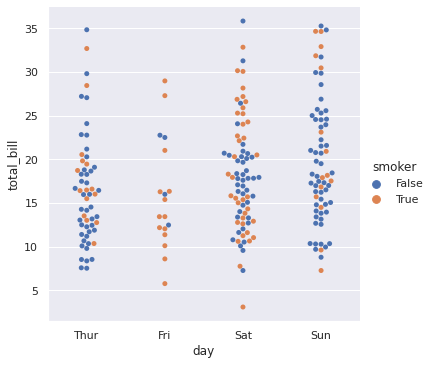

In [56]:
r =sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm",data=tips3)

In [57]:
tips3[["smoker", "tip","day"]].groupby(["smoker","day"]).mean()

tip
smoker day           
False  Thur  2.446905
       Fri   2.812500
       Sat   2.692683
       Sun   3.018302
True   Thur  2.967333
       Fri   2.570000
       Sat   2.588378
       Sun   3.211333

Pada nomor 7, terdapat pengaruh hari, dimana terlihat terdapat kecenderungan kenaikan tips pada hari minggu, baik bagi perokok maupun bukan perokok

## 9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)


Dari data yang didapat, kita dapat melihat bahwa terdapat kecenderungan jumlah pengunjung.

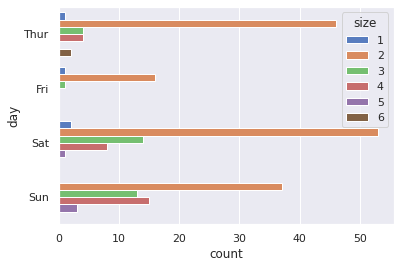

In [58]:
ax = sns.countplot(y = 'day', hue = 'size', palette = 'muted', data=tips3)

Terlihat bahwa pada hari Sabtu merupakan hari yang paling menguntungkan, dimana dapat dilakukan peningkatan pekerja pada hari itu, untuk membantu melayani pelanggan. Selain itu, kita juga bisa melihat bahwa kebanyakan pengunjung datang dengan jumlah berdua-dua. Hal ini berarti pengelola restoran dapat mengatur kursi menjadi dua-dua.

## 10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?

Saran yang bisa saya berikan adalah : 

1.   Meningkatkan pelayan pada hari Sabtu karena merupakan hari dengan pengunjung tertinggi.
2.   Meja sebaiknya diatur ulang agar mengakomodasi dua pelanggan.
3.   Pemilik restaurant dapat mengubah tema restaurant dengan menarget pelanggan pria, dikarenakan terdapat kecenderungan pengunjung pria.